# Shifting Visits

First we need to run functions.py which houses all my modules. To do this we use some magic to run another .py file with only one commmand in it: importing the functions.py file. I do this circuitous method since just running functions.py results in the functions trying to be run instead of being imported.

In [1]:
%run ../Modules/Importing.py

In [2]:
%matplotlib inline

## Differences between apVisit and apStar files

* apStar files contain all the visits and some combined spectra for one star whereas an apVisit file is just one visit and contains one spectra.

* apVisit files are identified by a plate number, mean julian date, and a fiber number whereas an apStar file is identified by a location ID and 2Mass ID.

## An Unshifted Plot

First, we want to look at an example of an spectra before it is shifted and then after. To do this, we use two functions called apStar_to_apVisit and Unshifted_Plotter. apStar_to_apVisit takes a location ID and a 2Mass ID and gives back a plate number, MJD, and fiber number. These values are then used as inputs for the Unshifted_Plotter.

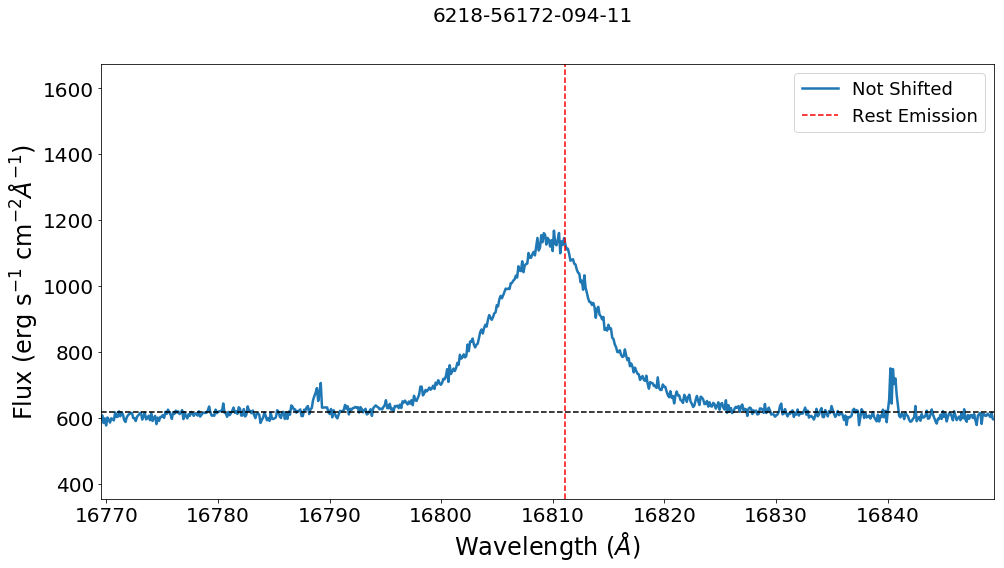

In [12]:
x = f.apStar_to_apVisit(4586,'2M03434449+3143092')
plateid = x[0][1][0]
MJD = x[0][1][1]
fiber = x[0][1][2]
emission_line = 12
f.Unshifted_Plotter(plateid,MJD,fiber,11)

## Applying a Velocity Shift

First, we start out by getting some info from the header, namely the BC parameter (which is the barycentric correction). Unfortunately the apogee package doesn't like to pull down the master header (ext=0) for apVisit files so we use astropy instead, as shown below.

```python
from astropy.io import fits
filename = functions.File_Path(plateid,MJD,fiber)
main_header = fits.open(filename)
vbc = main_header[0].header['BC']
```

What this does:
1. imports astropy and its fits function 
2. I call another function that creates a path to the file on the serve when it is passed a plate number, mean julian date, and fiber number
3. astropy opens up the apVisit.fits file
4. call the value from the dictionary of the header by passing it the key 'BC' and set it equal to vbc

Now that we have our vbc, which in this case vbc = 28.51, we need to calculate the rest wavelength of the Brackett 11 emission. To do this we need to use the Rydberg formula; normally we would use the general approximation that the nucleus' mass is infinite compared to the mass of an electron, i.e., the Rydberg constant. However, I believe that we need to use the reduced mass version of the constant (I figured this out just by playing around with the shifts).

### Calculating the rest wavelength

The formula for the wavelength of the Brackett 11 emission as measured in a lab (the rest wavelength) is given by $\frac{1}{\lambda}=R_M\left(\frac{1}{n_f^2}-\frac{1}{n_i^2}\right)$ where $R_M = R_{\infty}\left(1+\frac{m_e}{M}\right)^{-1}$ and M is the total mass of the nucleus. 

To calculate the reduced mass version of the Rydberg constant we do the following:

$$
R_M = R_{\infty}\left(1+\frac{m_e}{M}\right)^{-1} \\
R_{\infty} = 1.0973731568539\times10^7\text{ m}^{-1}\text{ ; }m_e = 9.10938356\times10^{-31}\text{ kg}\text{ ; }
    M = 1.672621898\times10^{-27}\text{ kg} \\
R_M = 1.0973731568539\times10^7\text{ m}^{-1}\left(1+\frac{9.10938356\times10^{-31}\text{ kg}}  {1.672621898\times10^{-27}\text{ kg}}\right)^{-1} \\
R_M = 1.096775834\times10^{7}\text{ m}^{-1}
$$

Now we have all the required parts to solve for our rest wavelength:
$$
\frac{1}{\lambda}=R_M\left(\frac{1}{n_f^2}-\frac{1}{n_i^2}\right)\\
\begin{matrix}\text{c} = 299792\text{ km}\text{ s}^{-1}&\text{;}&
    R_M = 1.096775834\times10^{7}\text{ m}^{-1}&\text{;}&
    n_i = 11&\text{;}&
    n_f = 4\end{matrix}\\
\frac{1}{\lambda}=1.096775834\times10^{7}\text{ m}^{-1}\left(\frac{1}{4^2}-\frac{1}{11^2}\right)=594842.2653\text{ m}^{-1}\\
\lambda= 1.681117934\times10^{-6}\text{ m}
$$

So our rest wavelength is approximately $ 16811.17934 \text{ }\unicode{x212B} $. $\unicode{x212B}$ is Angstroms or $10^{-10}$ m.

### Calculating the observed wavelength

We can now calculate the observed wavelength given by the unchanged spectra:
$$
\lambda_{observed} = \lambda\left(1-\text{v}_{bc}\text{ }/\text{ }\text{c}\right) \\
\lambda= 1.681117934\times10^{-6}\text{ m}\text{ ; }v_{bc} = 28.51\text{ km}\text{ s}^{-1}\text{ ; }
\text{c}=299792\text{ km}\text{ s}^{-1} \\
\lambda_{obs} = 1.681117934\times10^{-6}\text{ m}\left(1-\frac{28.51\text{ km}\text{ s}^{-1}}{299792 \text{ km}\text{ s}^{-1}}\right) \\
\lambda_{obs} = 1.681277807\times10^{-6}\text{ m}
$$

So the observed wavelength of the Brackett 11 emission line is at approximately $16812.77807\text{ }\unicode{x212B}$.

#### Calculating the shift

Last, we calculate the shift needed to bring the star into the heliocentric frame, $\Delta\lambda$.
$$
\Delta\lambda =  \big| \lambda_{obs} - \lambda \big| \\
\Delta\lambda = 16812.77807\text{ }\unicode{x212B} - 16811.17934 \text{ }\unicode{x212B}= 1.59873 \text{ }\unicode{x212B}\\
\Delta\lambda =  1.59873 \text{ }\unicode{x212B}
$$

Now that we have our $\Delta\lambda$ we can then apply this to the wave array which are the x-values to shift the array to the right 1.59873 $\unicode{x212B}$ to get:

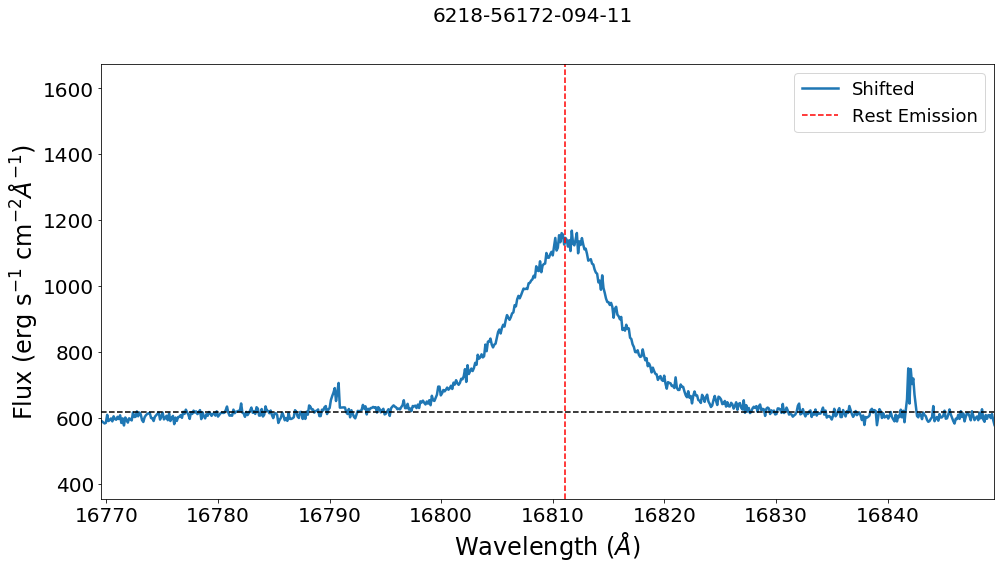

In [11]:
y = f.apStar_to_apVisit(4586,'2M03434449+3143092')
plateid = y[0][1][0]
MJD = y[0][1][1]
fiber = y[0][1][2]
emission_line = 12
f.Br_Equiv_Width_Plotter(plateid,MJD,fiber,11)

## Other Examples 

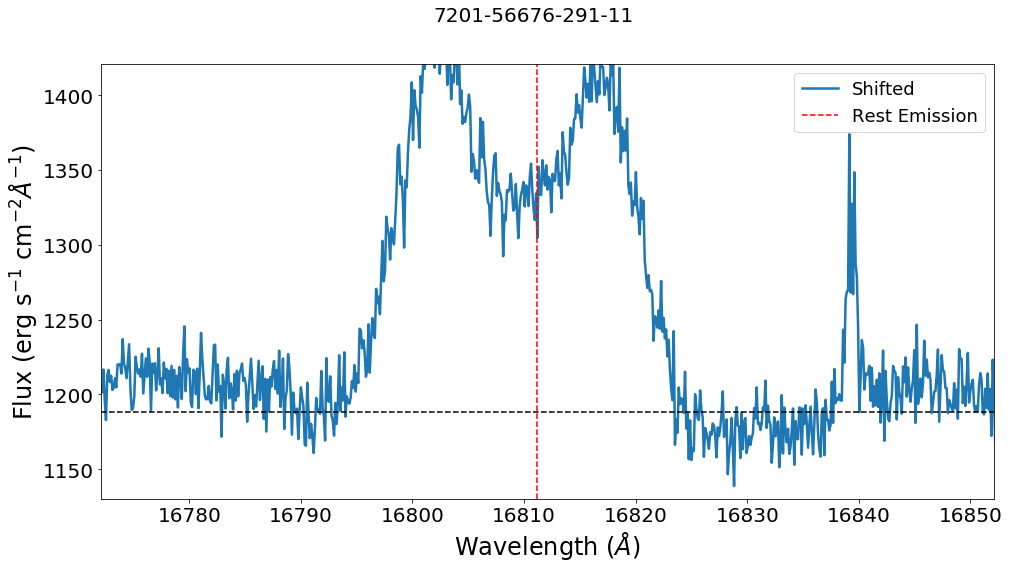

In [13]:
y = f.apStar_to_apVisit(4593,'2M05361555+3257145')
plateid = y[0][1][0]
MJD = y[0][1][1]
fiber = y[0][1][2]
emission_line = 12
f.Br_Equiv_Width_Plotter(plateid,MJD,fiber,11)

This spectra is an example of seeing two sides of the star velocity shifted from the other, i.e. one side is blueshifted and the other redshifted.

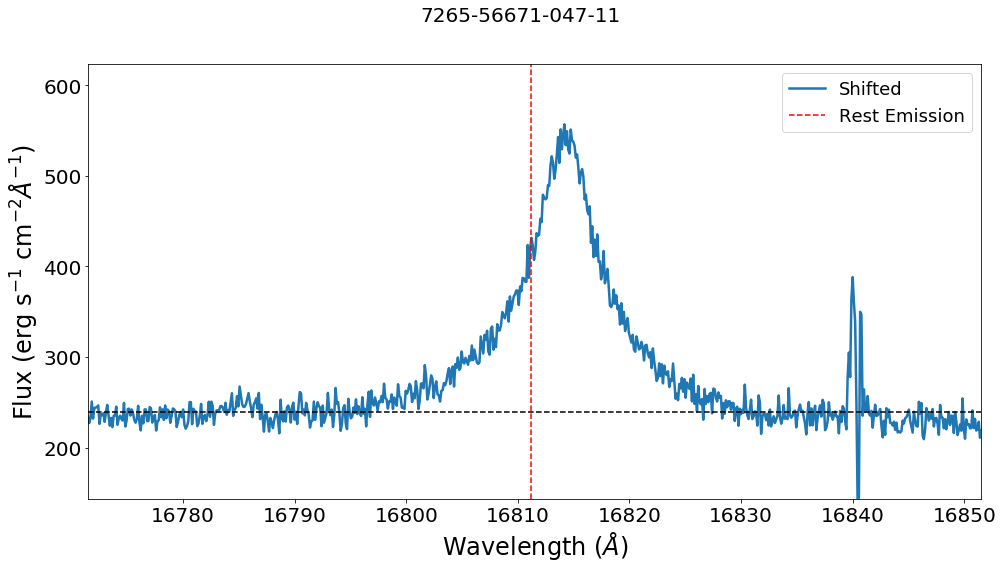

In [14]:
y = f.apStar_to_apVisit(4617,'2M06450343-0034140')
plateid = y[0][1][0]
MJD = y[0][1][1]
fiber = y[0][1][2]
emission_line = 12
f.Br_Equiv_Width_Plotter(plateid,MJD,fiber,11)

This spectra doesn't shift quite right. I calculated the shift required to get approximately on the peak at it is roughly 11 times the given barycentric correction...

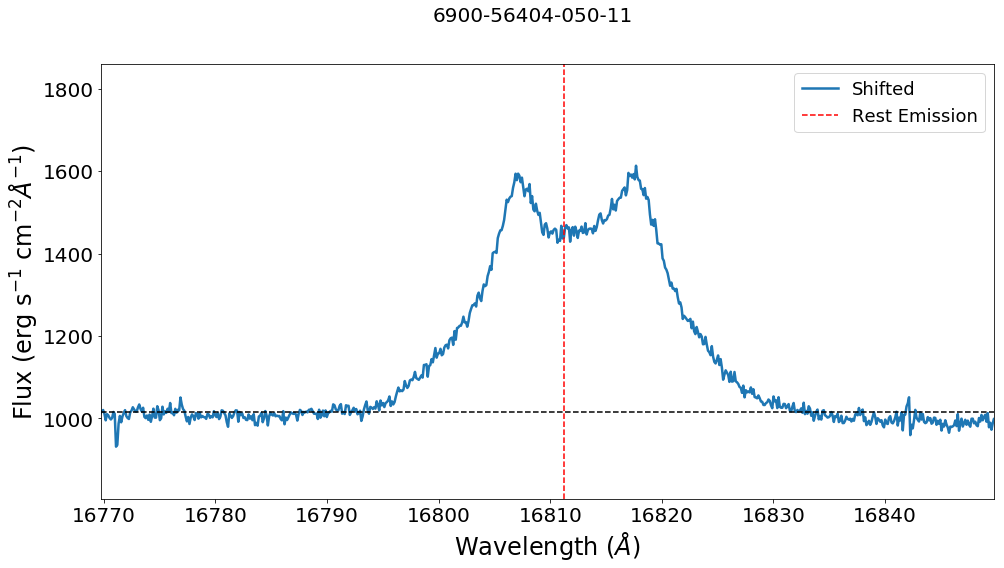

In [18]:
y = f.apStar_to_apVisit(4380,'2M18194176-1058093')
plateid = y[0][0][0]
MJD = y[0][0][1]
fiber = y[0][0][2]
emission_line = 12
f.Br_Equiv_Width_Plotter(plateid,MJD,fiber,11)

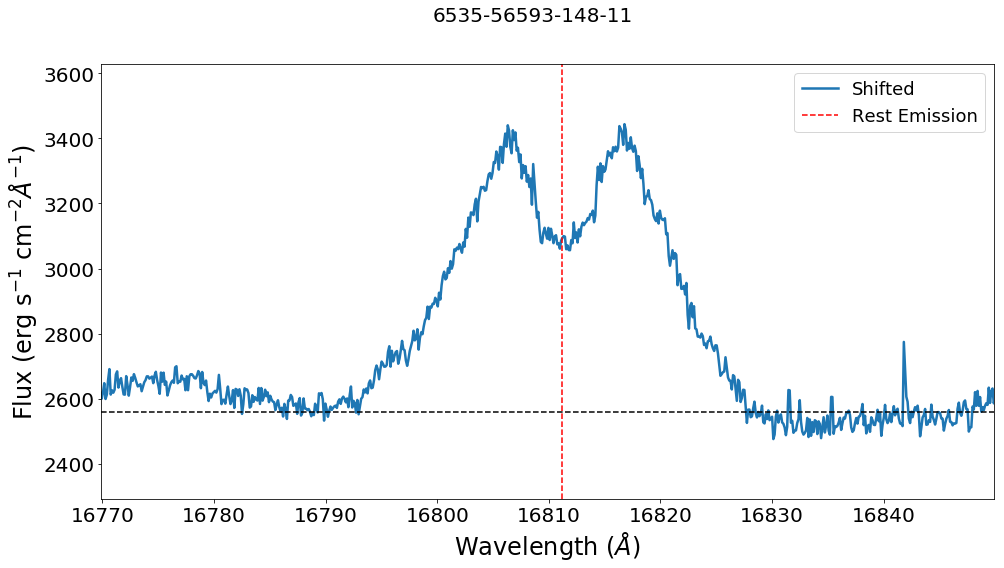

In [16]:
y = f.apStar_to_apVisit(4581,'2M06525305-1000270')
plateid = y[0][1][0]
MJD = y[0][1][1]
fiber = y[0][1][2]
emission_line = 12
f.Br_Equiv_Width_Plotter(plateid,MJD,fiber,11)